In [1]:
import sys
sys.path.append("../")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 
from supervised_learning import SVM

In [2]:
import numpy as np

np.random.seed(seed=0)
n_samples = 100
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [4]:
scaler = StandardScaler()
#trainデータからmeanとstdevを計算
scaler.fit(X_train)
#normarize x -> (x - x_mean)/s
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [5]:
svm = SVM(n_iterations=100, learning_rate=1e-3, threshold=1e-4,kernel='rbf', gamma=1, power=4, coef=4)
svm.fit(X_train, y_train, X_val, y_val)

iter: 1, train_margin: 0.000, val_margin:  0.000
iter: 2, train_margin: 0.000, val_margin:  0.000


/Users/ohmori/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ohmori/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
../supervised_learning/support_vector_machine.py:101: RuntimeWarning: invalid value encountered in greater
  y_pred = (y_pred > 0).astype(int)


iter: 3, train_margin: 0.000, val_margin:  0.000
iter: 4, train_margin: 0.000, val_margin:  0.000
iter: 5, train_margin: 0.000, val_margin:  0.000
iter: 6, train_margin: 0.000, val_margin:  0.000
iter: 7, train_margin: 0.000, val_margin:  0.000
iter: 8, train_margin: 0.000, val_margin:  0.000
iter: 9, train_margin: 0.000, val_margin:  0.000
iter: 10, train_margin: 0.000, val_margin:  0.000
iter: 11, train_margin: 0.000, val_margin:  0.000
iter: 12, train_margin: 0.000, val_margin:  0.000
iter: 13, train_margin: 0.000, val_margin:  0.000
iter: 14, train_margin: 0.000, val_margin:  0.000
iter: 15, train_margin: 0.000, val_margin:  0.000
iter: 16, train_margin: 0.000, val_margin:  0.000
iter: 17, train_margin: 0.000, val_margin:  0.000
iter: 18, train_margin: 0.000, val_margin:  0.000
iter: 19, train_margin: 0.000, val_margin:  0.000
iter: 20, train_margin: 0.000, val_margin:  0.000
iter: 21, train_margin: 0.000, val_margin:  0.000
iter: 22, train_margin: 0.000, val_margin:  0.000
iter: 2

In [6]:
pred = svm.predict(X_test)
pred

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

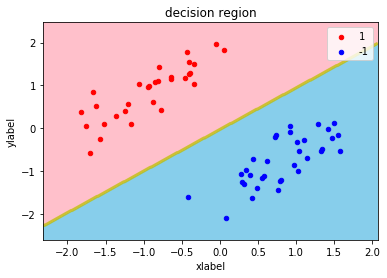

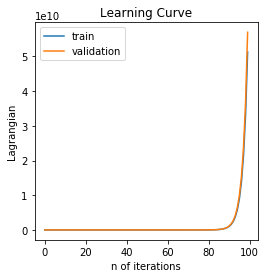

In [7]:
svm.decision_region(X_train, y_train)
svm.plot_learning_curve()